## Kato pipeline

In this notebook, we reproduce PCA results from Kato, et al. starting with Kato's raw data, transforming it as he did, and running PCA on the resulting data.

In [22]:
import sys
import os

%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
import numpy as np

sys.path.append('../src/')
sys.path.append('../lib/')
import data_config as dc
from tvregdiff import TVRegDiff
from analysis import Analyzer

import rnn

%load_ext autoreload
%autoreload


Using Theano backend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
wormData = dc.kato_matlab.data()

Reading


In [29]:
derivData = Analyzer(wormData[0]['deltaFOverF_deriv'].T)
rawData = Analyzer(wormData[0]['deltaFOverF'].T)
print(derivData.timeseries.shape)
print(rawData.timeseries.shape)

(3134, 107)
(3134, 107)


In [46]:
computedDerivData = Analyzer(rawData.tvd(iters=10, alpha=1, diff=None))

('Completed:', 0)
('Completed:', 10)
('Completed:', 20)
('Completed:', 30)
('Completed:', 40)
('Completed:', 50)
('Completed:', 60)
('Completed:', 70)
('Completed:', 80)
('Completed:', 90)
('Completed:', 100)


In [32]:
# Recurrent Neural Network
gen = rnn.generate_lstm_vanilla(rawData.timeseries, ep=5, output_iterations=3134)
rnnData = Analyzer(gen)
print(rnnData.timeseries.shape)

('sequence chunks:', 3130)
('chunk width:', 1)
('vector dimension:', 107)
('batch size:', 10)
('X shape:', (3130, 1, 107))
Build model...
Epoch 1/5
3130/3130 [==============================] - 13s - loss: -0.0940    
Epoch 2/5
3130/3130 [==============================] - 14s - loss: 0.0710    
Epoch 3/5
3130/3130 [==============================] - 14s - loss: -0.0198    
Epoch 4/5
3130/3130 [==============================] - 17s - loss: 0.0243    
Epoch 5/5
3130/3130 [==============================] - 23s - loss: 0.0542    
('Predicting with shape:', (10, 1, 107))
(3134, 107)


In [47]:
rnnDerivData = Analyzer(rnnData.tvd(iters=10, alpha=1, diff=None))

('Completed:', 0)
('Completed:', 10)
('Completed:', 20)
('Completed:', 30)
('Completed:', 40)
('Completed:', 50)
('Completed:', 60)
('Completed:', 70)
('Completed:', 80)
('Completed:', 90)
('Completed:', 100)


### Graphs
The first row of graphs shows:

- Column 1: Kato's "raw" (deltaFoverF) data, as he provided it
- Column 2: Kato's derivative data (deltaFoverFderiv), as he provided it
- Column 3: OUR calculation of PCA on KATO's derivative data

The second row of graphs shows:

- Column 1: Kato's "raw" (deltaFoverF) data, as he provided it
- Column 2: OUR calculation of derivative data, using an off-the-shelf implementation of TVRegDiff (Chartrand, et al.)
- Column 3: OUR calculation of PCA on OUR derivative data

The third row of graphs shows:

- Column 1: OUR RNN-generated "raw" data
- Column 2: OUR numerical differentation of OUR RNN-generated "raw" data, using an off-the-shelf implementation of TVRegDiff (Chartrand, et al.)
- Column 3: OUR calculation of PCA on OUR derivative data of OUR RNN-generated "raw" data


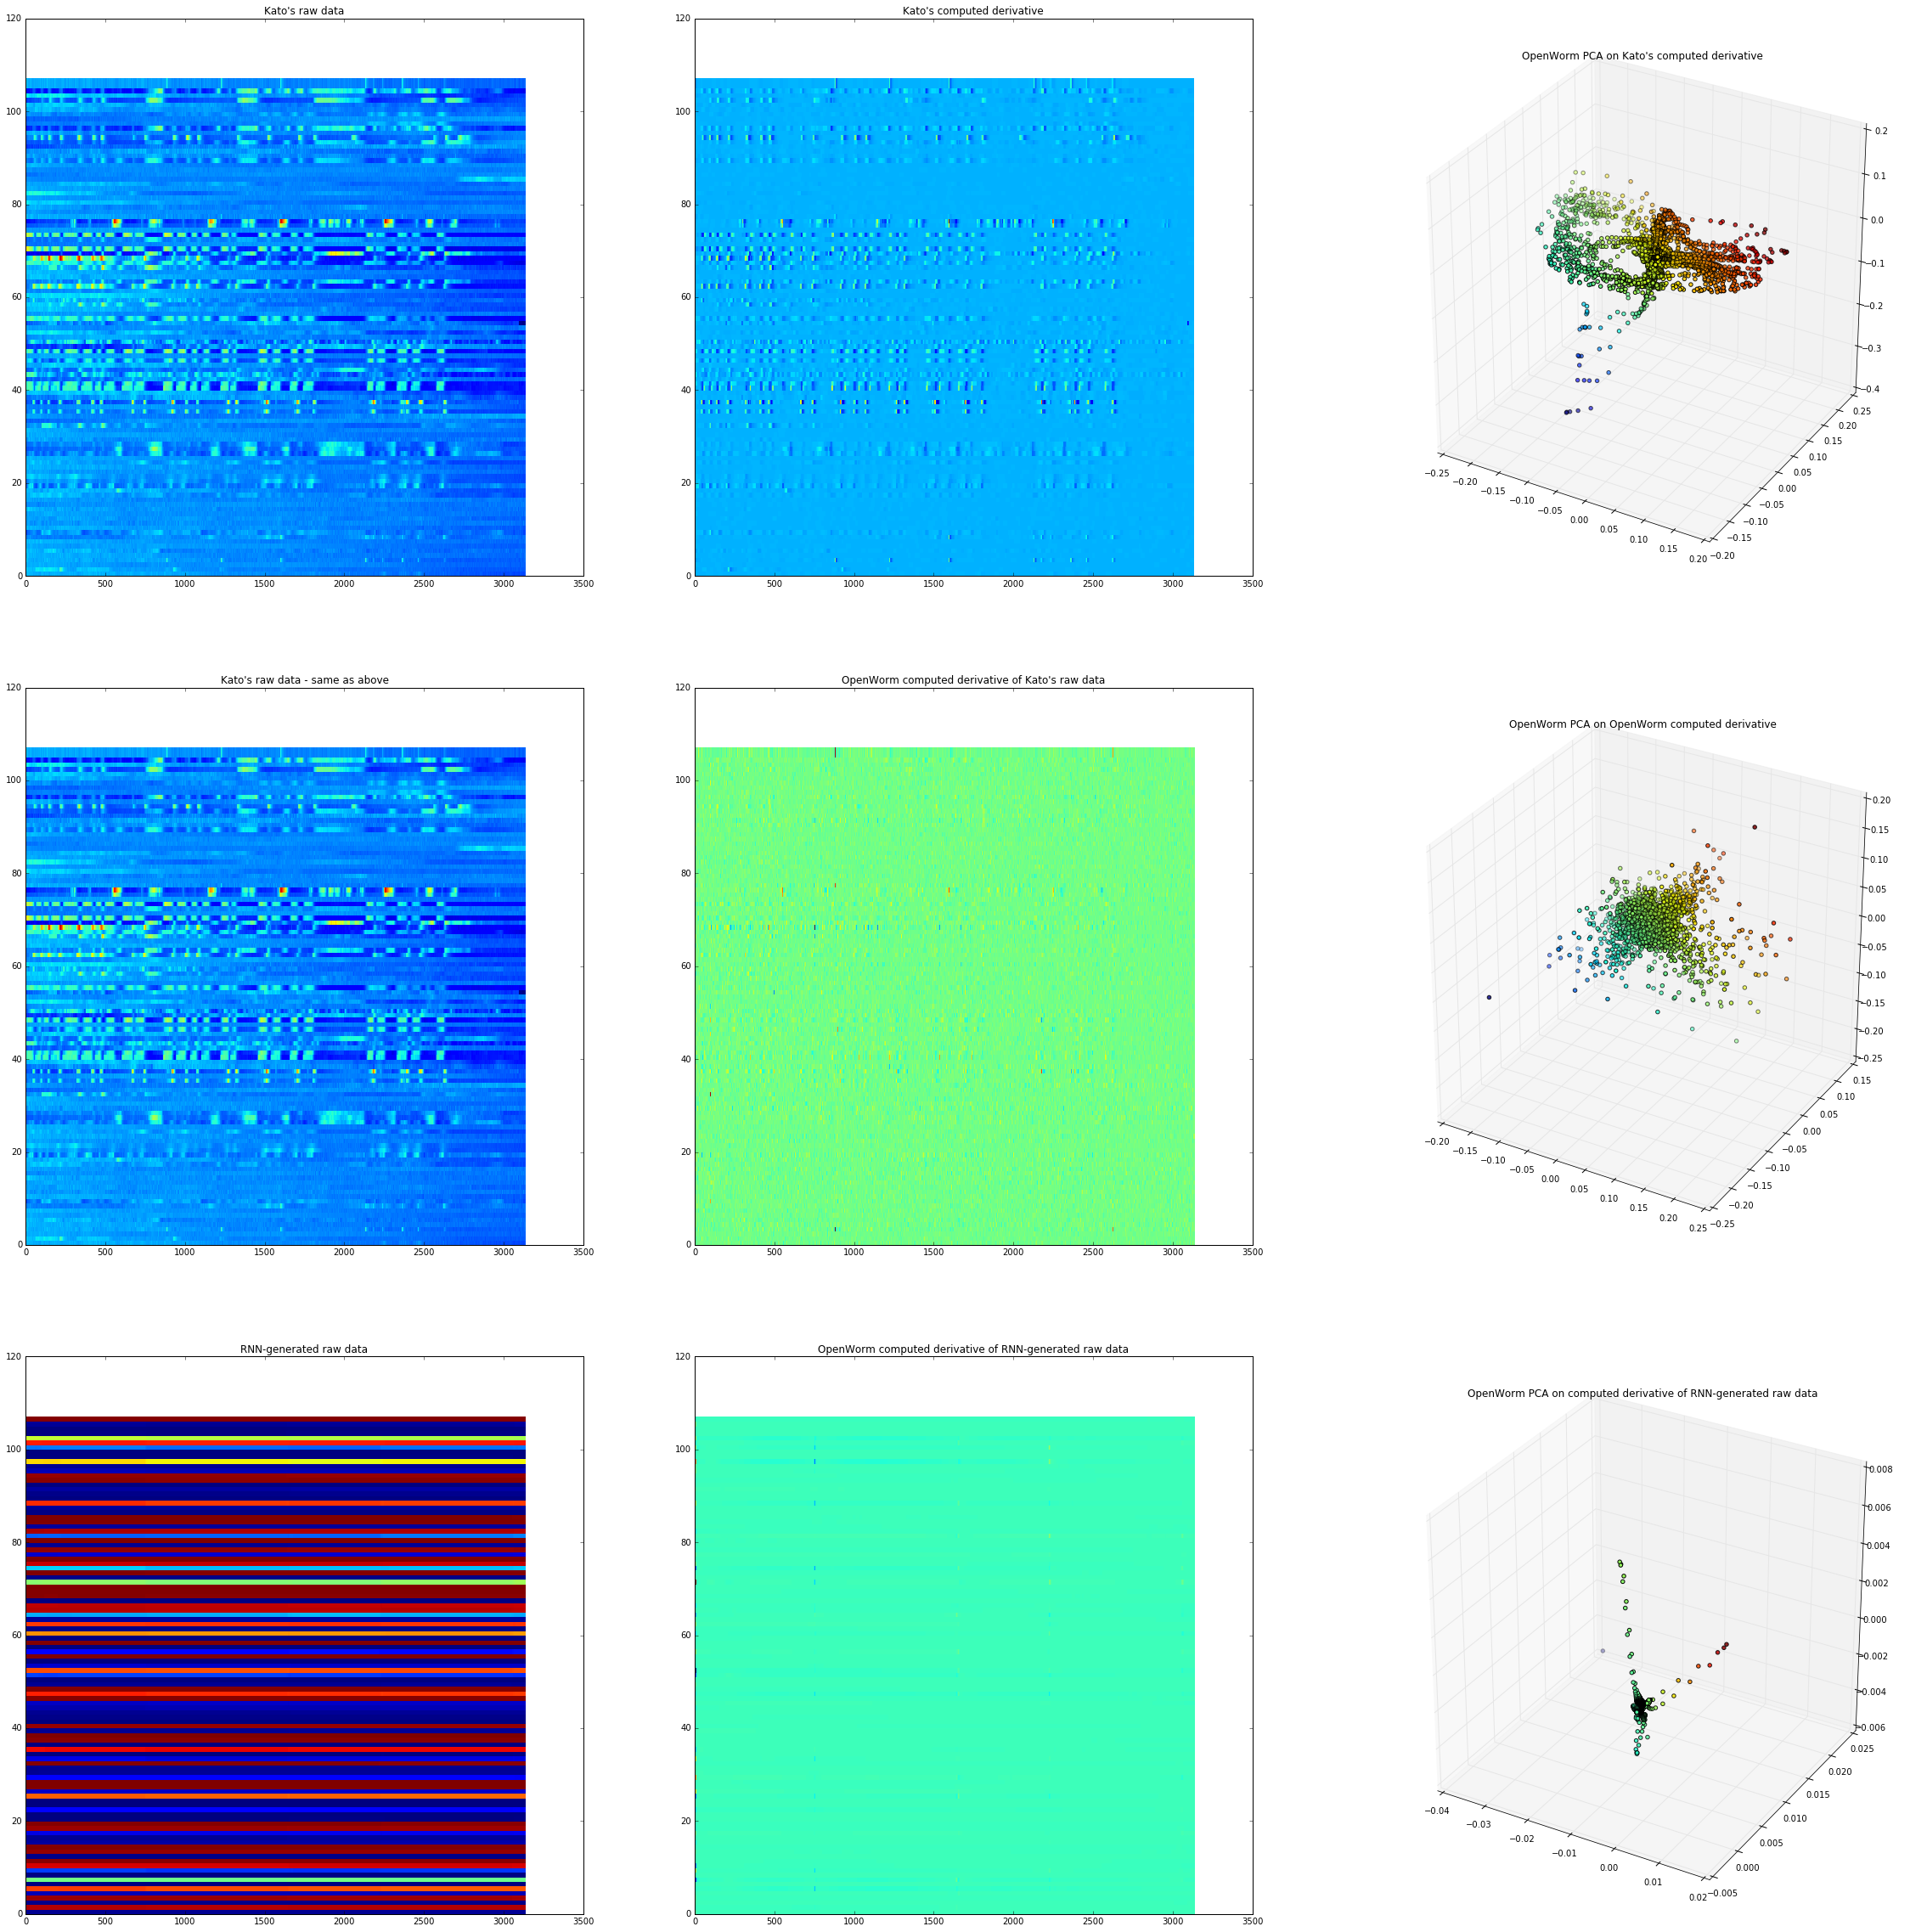

In [48]:
fig = plt.figure(figsize=(40,40))

ax_raw1 = fig.add_subplot(3, 3, 1)
ax_deriv1 = fig.add_subplot(3, 3, 2)
ax_pca1 = fig.add_subplot(3, 3, 3, projection='3d')

ax_raw2 = fig.add_subplot(3,3,4)
ax_deriv2 = fig.add_subplot(3,3,5)
ax_pca2 = fig.add_subplot(3,3,6, projection='3d')

ax_raw3 = fig.add_subplot(3,3,7)
ax_deriv3 = fig.add_subplot(3,3,8)
ax_pca3 = fig.add_subplot(3,3,9, projection='3d')

ax_raw1.set_title("Kato's raw data")
ax_deriv1.set_title("Kato's computed derivative")
ax_pca1.set_title("OpenWorm PCA on Kato's computed derivative")

ax_raw2.set_title("Kato's raw data - same as above")
ax_deriv2.set_title("OpenWorm computed derivative of Kato's raw data")
ax_pca2.set_title("OpenWorm PCA on OpenWorm computed derivative")

ax_raw3.set_title("RNN-generated raw data")
ax_deriv3.set_title("OpenWorm computed derivative of RNN-generated raw data")
ax_pca3.set_title("OpenWorm PCA on computed derivative of RNN-generated raw data")

rawData.timeseries_plot(ax_raw1)
derivData.timeseries_plot(ax_deriv1)
derivData.pca_plot3d(ax_pca1)

rawData.timeseries_plot(ax_raw2)
computedDerivData.timeseries_plot(ax_deriv2)
computedDerivData.pca_plot3d(ax_pca2)

rnnData.timeseries_plot(ax_raw3)
rnnDerivData.timeseries_plot(ax_deriv3)
rnnDerivData.pca_plot3d(ax_pca3)

plt.show()